In [1]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Init Plugin
Init Graph Optimizer
Init Kernel
Tensor Flow Version: 2.5.0
Keras Version: 2.5.0

Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:00:33) 
[Clang 13.0.1 ]
Pandas 1.3.5
Scikit-Learn 1.1.1
GPU is available


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()  # arrays

In [5]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


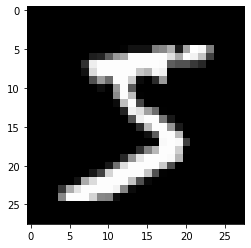

In [6]:
single_image = x_train[0]
single_image  # arrays
plt.imshow(single_image,cmap='gray') # image show

In [7]:
y_train  # 1º number is 5
y_train.shape

(60000,)

In [8]:
# convert to categorical
from keras.utils.np_utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)
y_cat_test
y_cat_train[0]  # number 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
single_image
#single_image.max()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
single_image.max()

255

In [11]:
# normalize values between 0 and 1
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()
x_train[0] # 1º image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

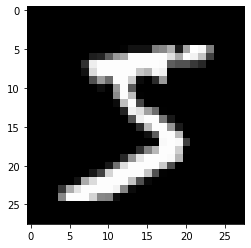

In [12]:
plt.imshow(x_train[0],cmap='gray')

In [13]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [14]:
# need to reshape, include the color channel
x_train = x_train.reshape(60000,28,28,1)  # 60k images
x_test = x_test.reshape(10000,28,28,1)    # 10k images

In [15]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD


In [96]:
# CNN Model
#
model = Sequential()
# Convolutional layer
model.add(Conv2D(filters=32,  # Integer, the dimensionality of the output space
                 #  (i.e. the number of output filters in the convolution).
                 # total feature maps
                 kernel_size=(3,3), # hyperparameter height and width
                 strides = 1, 
                 padding='same', 
                 # When padding="same" and strides=1, 
                 #the output has the same size as the input.
                 activation="relu", 
                 input_shape=(28, 28, 1)))
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))  
# max pooling layer 2x2 window
# channels_last corresponds to inputs with shape (batch, height, width, channels)
# max pooling layer, summarizing the nearby pixels.
# Used to downsample images

# Flatten  2d ---> 1d
model.add(Flatten()) 
# convert convolutionary inputs into format fully connected layer

# Dense layers
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#  Between the feature extractor and the output layer,
#  we can add a dense layer to interpret the features, in this case with 128 nodes.
#  fully connected layer 128 units with ReLU

model.add(Dense(10, activation='softmax'))
#  number_of_classes = 10
#  Between the feature extractor and the output layer,
#  we can add a dense layer to interpret the features, in this case with 100 nodes.
# fully connected later with a softmax activation function
# softmax because is multiclassification


# compile the model
model.compile(#optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              # stochastic gradient descent  
              optimizer='rmsprop',  # root mean square propagation
              loss='categorical_crossentropy', # multiclass classification
              metrics=['accuracy'])   
#
print(model.summary())

In [97]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________
None


In [98]:
 model.fit(x_train, # featurers
            y_cat_train, # target
            epochs=10, batch_size=32, # 10 running for entire dataset
            validation_data=(x_test, # features test
                             y_cat_test),  # target test
            verbose=0)

2022-09-18 12:58:00.796614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-09-18 12:58:11.400274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [99]:
# evaluate model
model.metrics_names

# if accurancy is good in train dataset but poor in test, it is overfitting

['loss', 'accuracy']

In [100]:
model.evaluate(x_test,y_cat_test) # evaluate test data

313/313 [==============================] - 2s 5ms/step - loss: 0.0647 - accuracy: 0.9869


[0.06472523510456085, 0.9869000315666199]

In [101]:
from sklearn.metrics import classification_report

In [111]:
y_pred = model.predict_classes(x_test)
print(y_pred)
print(y_test)
print(classification_report(y_test,y_pred))

/Users/nestor/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [118]:
print(x_train.shape)
print(x_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)
(10000,)


In [119]:

history = model.fit(x_train, # featurers
            y_cat_train, # target
            epochs=2, batch_size=32, # 10 running for entire dataset
            validation_data=(x_test, # features test
                             y_cat_test),  # target test
            verbose=0)

In [120]:
# if accuracy is good in train dataset but poor in test, it is overfitting
import pandas as pd
from matplotlib import pyplot as plt

In [121]:
# evaluate model
_, acc = model.evaluate(x_test, y_cat_test, verbose=0)
print('Accuracy test data --> %.3f' % (acc * 100.0))

Accuracy test data --> 98.620
{'loss': [0.00019066418462898582, 0.00027679908089339733], 'accuracy': [0.9999499917030334, 0.9998666644096375], 'val_loss': [0.13390283286571503, 0.1452060490846634], 'val_accuracy': [0.9878000617027283, 0.9862000346183777]}


In [122]:
PDmodel = pd.DataFrame(history.history)
PDmodel

,loss,accuracy,val_loss,val_accuracy
0,0.000191,0.999950,0.133903,0.9878
1,0.000277,0.999867,0.145206,0.9862


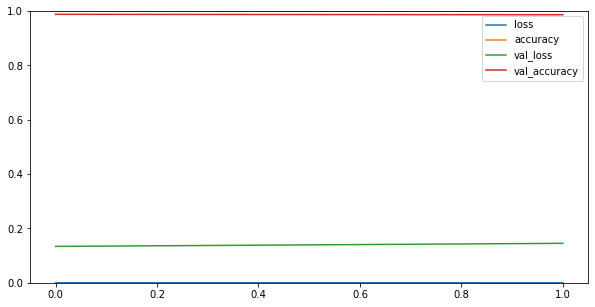

In [123]:
# show  learning curves
PDmodel.plot(figsize=(10, 5)) 
#plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()